In [1]:
# Importing the necessary libraries.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the training data.
df_agri = pd.read_csv('train_agriculture.csv')

# Loading the testing data.
agri_test = pd.read_csv('test_agriculture.csv')

In [3]:
# take a look at the top 5 rows of the train set.
df_agri.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1


In [4]:
# take a look at the top 5 rows of the test set.
agri_test.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,F00000002,188,1,1,1,0,NaN,0,2
1,F00000007,410,1,1,1,0,0.0,0,2
2,F00000011,626,1,0,1,0,0.0,0,2
3,F00000013,731,1,0,1,0,0.0,0,2
4,F00000014,789,0,0,1,0,0.0,0,1


In [5]:
# Let's check the shape of the dataset.
print(df_agri.shape)
print(agri_test.shape)

(4599, 10)
(1199, 9)


The data numerical in nature having 4599 rows and 10 columns in train dataset and 1199 rowws and 9 coumns in test dataset.

In [6]:
# Let's check the data types of each feature.

df_agri.dtypes

ID                          object
Estimated_Insects_Count      int64
Crop_Type                    int64
Soil_Type                    int64
Pesticide_Use_Category       int64
Number_Doses_Week            int64
Number_Weeks_Used          float64
Number_Weeks_Quit            int64
Season                       int64
Crop_Damage                  int64
dtype: object

The datset contains 3 data types : 1 column having 'float64' and  'object' each and rest columns are of 'int64' type.

So, below are the details of each feature of the dataset.

In [ ]:
ID                          Unique ID
Estimated_Insects_Count     Estimated_Insects_Count per square meter
Crop_Type                   Category of crop (0,1)
Soil_Type                   Category of soil (0,1)
Pesticide_Use_Category      Type of pesticides uses (1 - never, 2- previously used, 3 - currently using)
Number_Doses_Week           Number of Doses per week
Number_Weeks_Used           Number of weeks used
Number_Weeks_Quit           Number of weeks quit
Season                      Season category (1,2,3)
Crop_Damage                 Crop damage category (0 - alive ,1 -damage due to other causes, 2 - damage due to pesticides)

In [7]:
# Let's use the describe function to check the statistical summary of the dataset.

df_agri.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
count,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4157.000000,4599.000000,4599.000000,4599.000000
mean,1363.000435,0.224831,0.476625,2.283540,26.477495,28.891027,9.205479,1.894325,0.194390
std,814.439120,0.417517,0.499508,0.471978,15.524647,12.586005,9.713253,0.694952,0.454597
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,1212.000000,0.000000,0.000000,2.000000,20.000000,28.000000,7.000000,2.000000,0.000000
75%,1786.000000,0.000000,1.000000,3.000000,40.000000,38.000000,16.000000,2.000000,0.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,66.000000,47.000000,3.000000,2.000000


OBSERVATIONS :
    
    1. The range of variables id between 0-3 for Crop_Type, Soil_Type, Pesticide_Use_Category, Season and Crop_Damage.
    2. The range of Estimated_Insects_Count is very high. Thus, the dats is highly spreaded.
    3. The mean is greater for every variable then it's median except for the season variable.

In [8]:
# Let's check the null values.

df_agri.isnull().sum()

ID                           0
Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          442
Number_Weeks_Quit            0
Season                       0
Crop_Damage                  0
dtype: int64

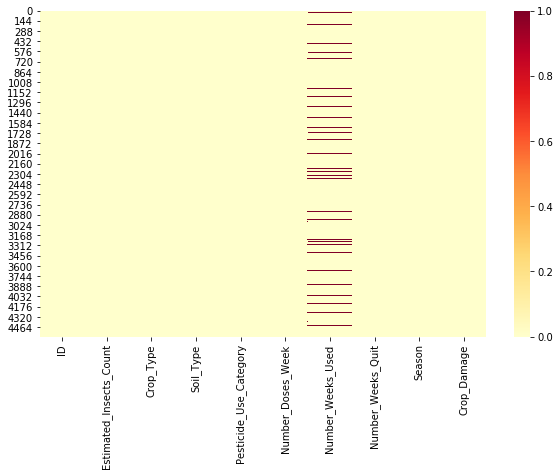

In [9]:
# Visualizing the null values using heatmap.

plt.figure(figsize=(10,6))
sns.heatmap(df_agri.isnull(), cmap = 'YlOrRd')
plt.show()

There are null values present only in Number_Weeks_Used.

In [10]:
# Let's check the correlation.

df_agri.corr()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
Estimated_Insects_Count,1.000000,-0.036911,-0.151796,-0.027111,-0.122509,0.449470,0.246719,-0.009482,0.202312
Crop_Type,-0.036911,1.000000,-0.175019,0.349662,-0.163832,-0.002237,-0.273475,-0.000549,0.021772
Soil_Type,-0.151796,-0.175019,1.000000,0.021661,0.050099,-0.098399,-0.034355,0.011052,-0.059481
Pesticide_Use_Category,-0.027111,0.349662,0.021661,1.000000,-0.005985,0.387982,-0.569467,0.008487,0.199195
Number_Doses_Week,-0.122509,-0.163832,0.050099,-0.005985,1.000000,0.104022,-0.032381,-0.003768,-0.018363
Number_Weeks_Used,0.449470,-0.002237,-0.098399,0.387982,0.104022,1.000000,-0.467386,-0.011108,0.244988
Number_Weeks_Quit,0.246719,-0.273475,-0.034355,-0.569467,-0.032381,-0.467386,1.000000,0.004861,-0.152918
Season,-0.009482,-0.000549,0.011052,0.008487,-0.003768,-0.011108,0.004861,1.000000,-0.016196
Crop_Damage,0.202312,0.021772,-0.059481,0.199195,-0.018363,0.244988,-0.152918,-0.016196,1.000000


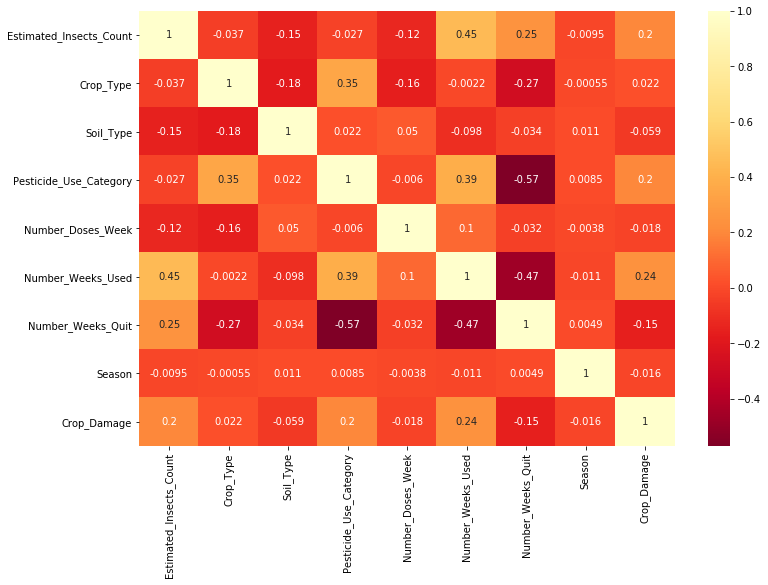

In [11]:
# Let's Visualize the correlation using heatmap.

plt.figure(figsize=(12,8))
sns.heatmap(df_agri.corr(), cmap= "YlOrRd_r", annot= True)

Observations :
    
    1. The strongest negative correlation can be seen between Pesticide_Use_Category and Number_Weeks_Quit.
    2. Number_Weeks_Used and Number_Weeks_Quit are also strongly7 negatively related.
    3. Overall the data set is neither positively nor negatively correlated.

In [12]:
# Dropping the ID from training and testing data.

df_agri = df_agri.drop(['ID'], axis=1)
print(df_agri.columns)

agri_test = agri_test.drop(['ID'], axis=1)
print(agri_test.columns)

Index(['Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season', 'Crop_Damage'],
      dtype='object')
Index(['Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season'],
      dtype='object')


Thus the column is dropped from both the datasets.

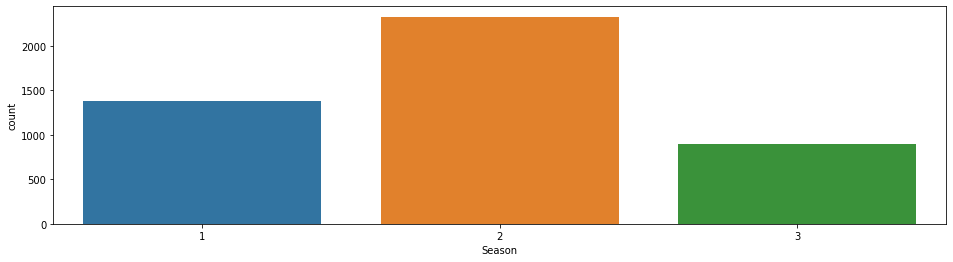

In [13]:
# UNIVARIATE ANALYSIS
# Visualizing the counts of target variable.

plt.figure(figsize=(16,4))
sns.countplot(df_agri['Season'],data=df_agri )
plt.show()

The count of Season 2 is maximum as compared to other seasons.

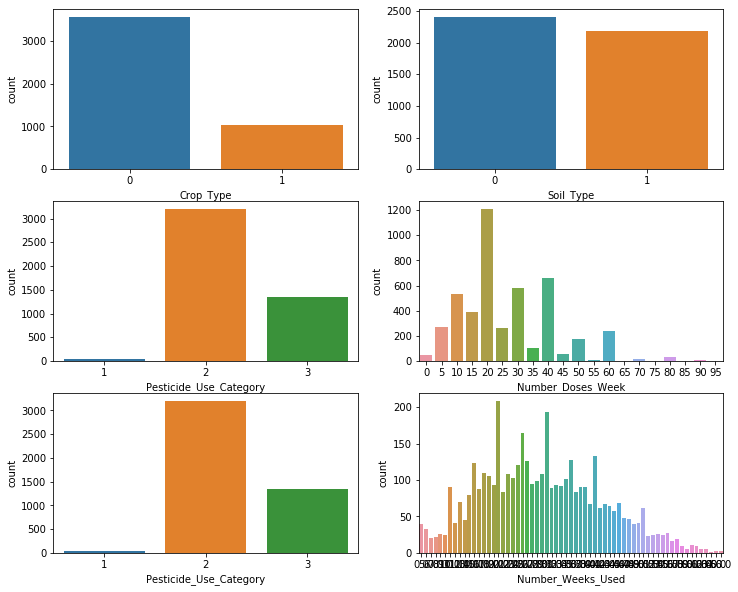

In [14]:
# Visualizing the categorical data with target variable as a hue. 

fig,ax = plt.subplots(3,2, figsize=(12,10))               
sns.countplot(x = "Crop_Type", data = df_agri, ax = ax[0,0]) 
sns.countplot(x = "Soil_Type", data = df_agri, ax = ax[0,1]) 
sns.countplot(x = "Pesticide_Use_Category", data = df_agri, ax = ax[1,0]) 
sns.countplot(x = "Number_Doses_Week", data = df_agri, ax = ax[1,1])
sns.countplot(x = "Pesticide_Use_Category", data = df_agri, ax = ax[2,0]) 
sns.countplot(x = "Number_Weeks_Used", data = df_agri, ax = ax[2,1]) 
plt.show()

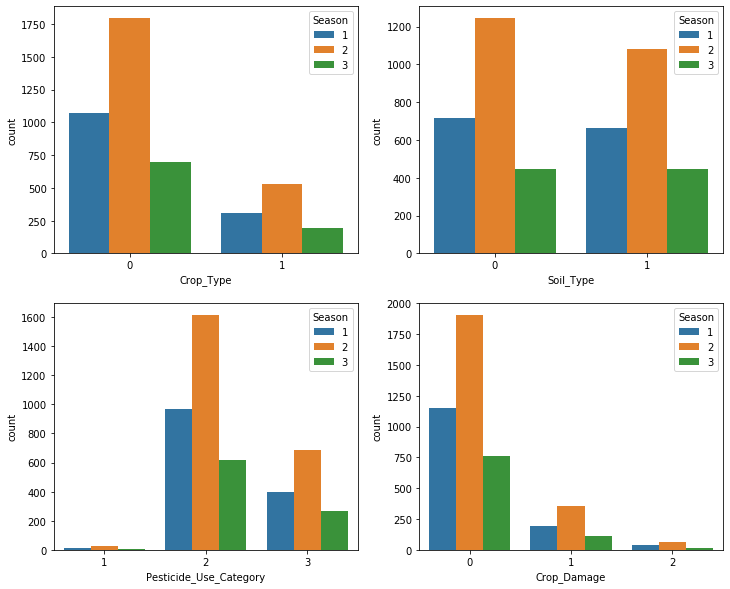

In [15]:
# Visualizing the categorical data with target variable as a hue. 

fig,ax = plt.subplots(2,2, figsize=(12,10))               
sns.countplot(x = "Crop_Type", hue = "Season", data = df_agri, ax = ax[0,0]) 
sns.countplot(x = "Soil_Type", hue = "Season", data = df_agri, ax = ax[0,1]) 
sns.countplot(x = "Pesticide_Use_Category", hue = "Season", data = df_agri, ax = ax[1,0]) 
sns.countplot(x = "Crop_Damage",hue = "Season", data = df_agri, ax = ax[1,1]) 
plt.show()

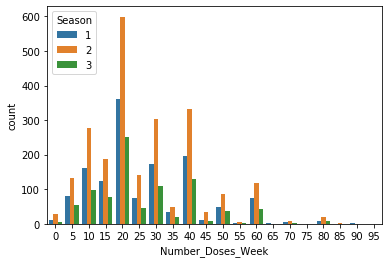

In [16]:

sns.countplot(x = "Number_Doses_Week", hue = "Season", data = df_agri)

The count of Season 2 is high in every category of variable visualized above.

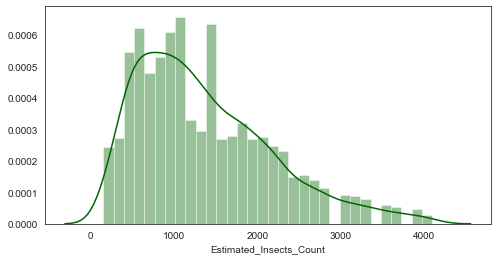

In [17]:
# Let's check the distribution of age using distribution plot.

sns.set_style('white')
plt.figure(figsize=(8,4))
sns.distplot(df_agri['Estimated_Insects_Count'], color='darkgreen')

The distribution is not purely righly skewed not it's perfectly distributed normally.

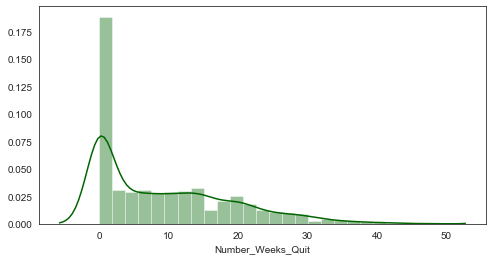

In [18]:
# Let's check the distribution of age using distribution plot.

sns.set_style('white')
plt.figure(figsize=(8,4))
sns.distplot(df_agri['Number_Weeks_Quit'], color='darkgreen')

In [21]:
The distribution righly skewed.

SyntaxError: invalid syntax (<ipython-input-21-bcf726bb1195>, line 1)

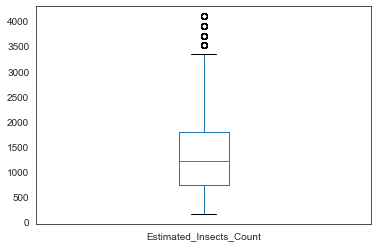

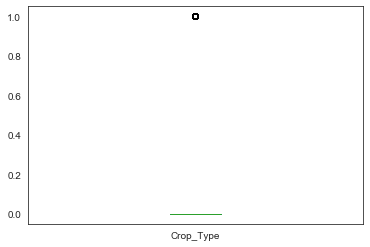

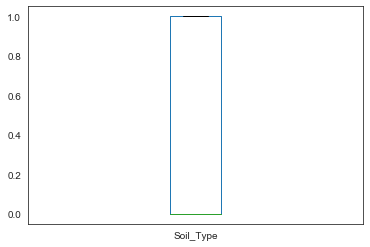

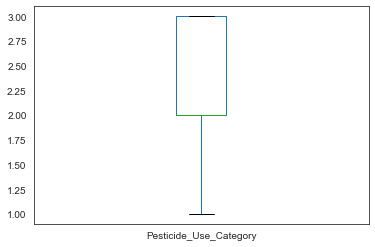

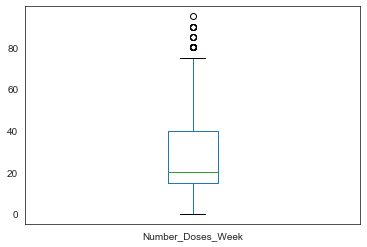

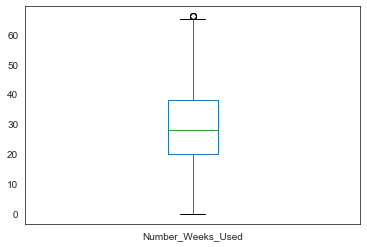

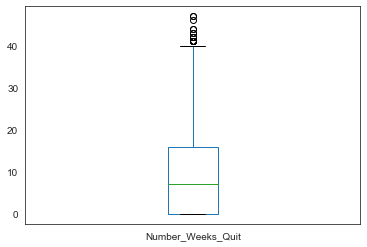

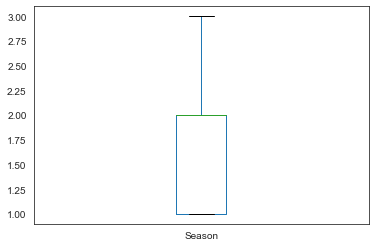

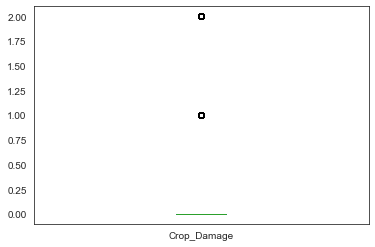

In [19]:
# Let's plot the outliers

for i in df_agri.columns:
    sns.set_style('white')
    x = df_agri[i].plot.box()
    plt.show()

There are no outliers present in 'Season', 'Pesticide_Use_category' and 'Soil Type'.

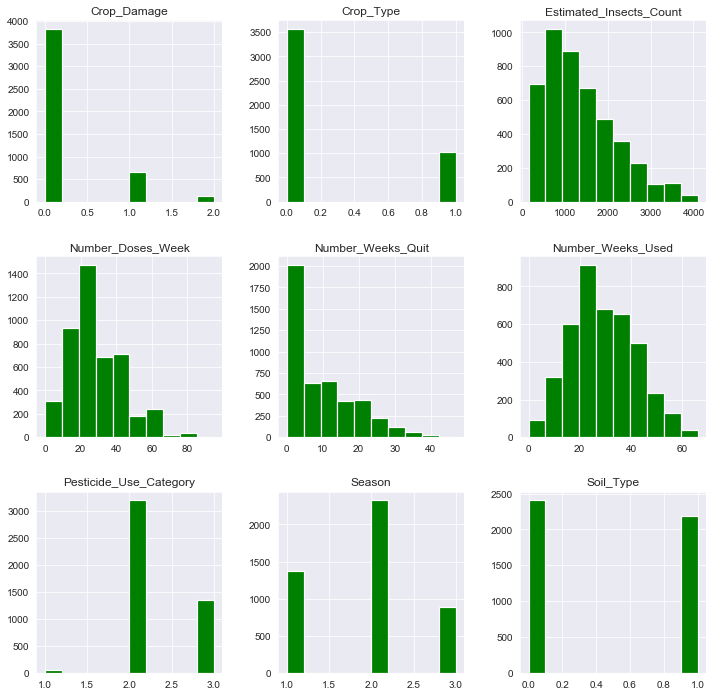

In [20]:
# Distribution of Different Features of the Dataset

sns.set_style('dark')
distribution = df_agri.hist(edgecolor = 'white', linewidth = 1.2, color = 'g')
fig = plt.gcf()
fig.set_size_inches(12,12)

In [22]:
df_agri.columns

Index(['Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season', 'Crop_Damage'],
      dtype='object')

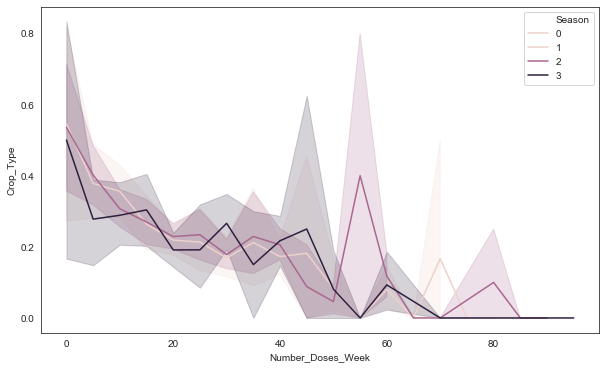

In [28]:
# BIVARIATE ANALYSIS

# Relationship between Number_Doses_Week and Crop_Type whith target variable as hue.
sns.set_style('white')
plt.figure(figsize=(10,6))
x = sns.lineplot(x = 'Number_Doses_Week' ,y = "Crop_Type",hue = 'Season', data = df_agri)
plt.show()

# There is a negative relation between the two.

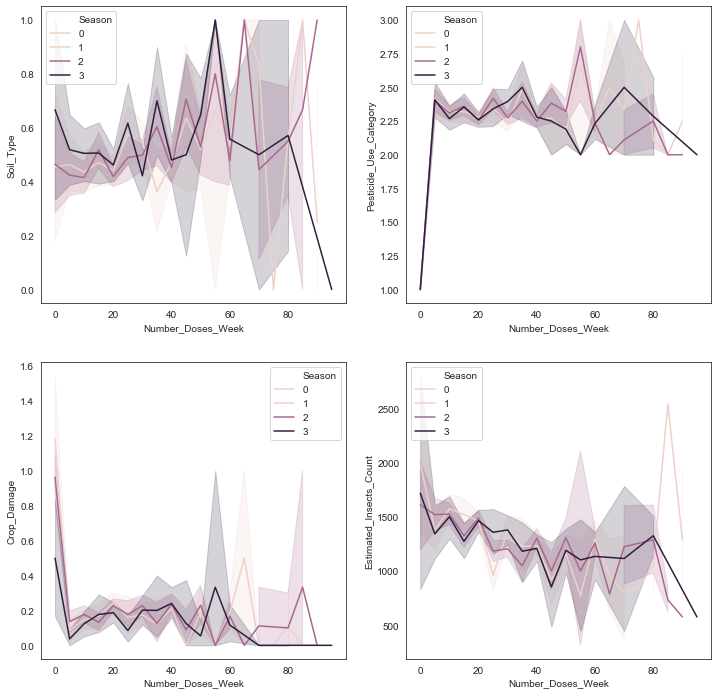

In [29]:
# Let's check the relationship of Number_Doses_Week with other variables with hue as a target variable.

fig,ax = plt.subplots(2,2, figsize=(12,12))               
sns.lineplot(x="Number_Doses_Week", y="Soil_Type", hue="Season",data=df_agri,ax = ax[0,0]) 
sns.lineplot(x="Number_Doses_Week", y="Pesticide_Use_Category", hue="Season",data=df_agri, ax = ax[0,1]) 
sns.lineplot(x="Number_Doses_Week", y="Crop_Damage",hue="Season",data=df_agri, ax = ax[1,0]) 
sns.lineplot(x="Number_Doses_Week", y="Estimated_Insects_Count",hue="Season",data=df_agri, ax = ax[1,1]) 
plt.show()

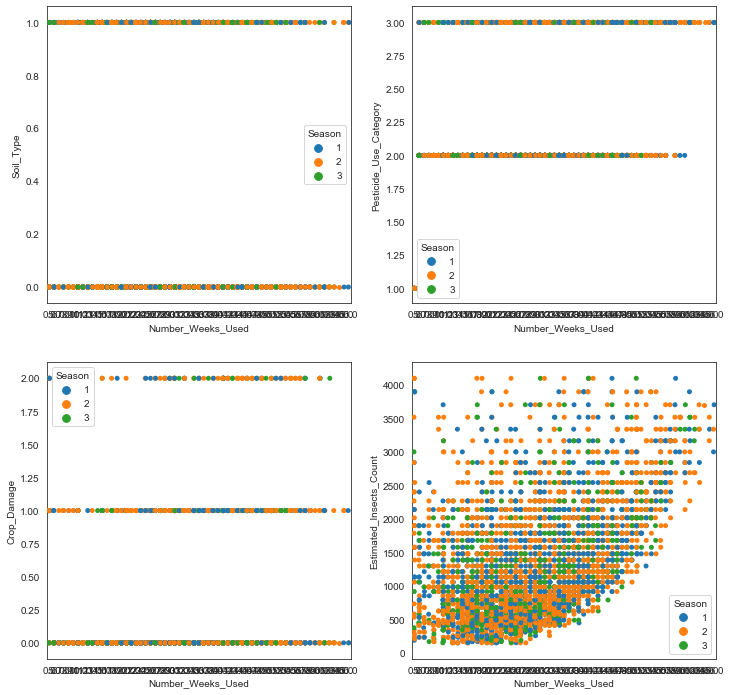

In [31]:
# Relationship between Number_Weeks_Used and Crop_Type whith target variable as hue.

fig,ax = plt.subplots(2,2, figsize=(12,12))               
sns.stripplot(x="Number_Weeks_Used", y="Soil_Type", hue="Season",data=df_agri,ax = ax[0,0]) 
sns.stripplot(x="Number_Weeks_Used", y="Pesticide_Use_Category", hue="Season",data=df_agri, ax = ax[0,1]) 
sns.stripplot(x="Number_Weeks_Used", y="Crop_Damage",hue="Season",data=df_agri, ax = ax[1,0]) 
sns.stripplot(x="Number_Weeks_Used", y="Estimated_Insects_Count",hue="Season",data=df_agri, ax = ax[1,1]) 
plt.show()

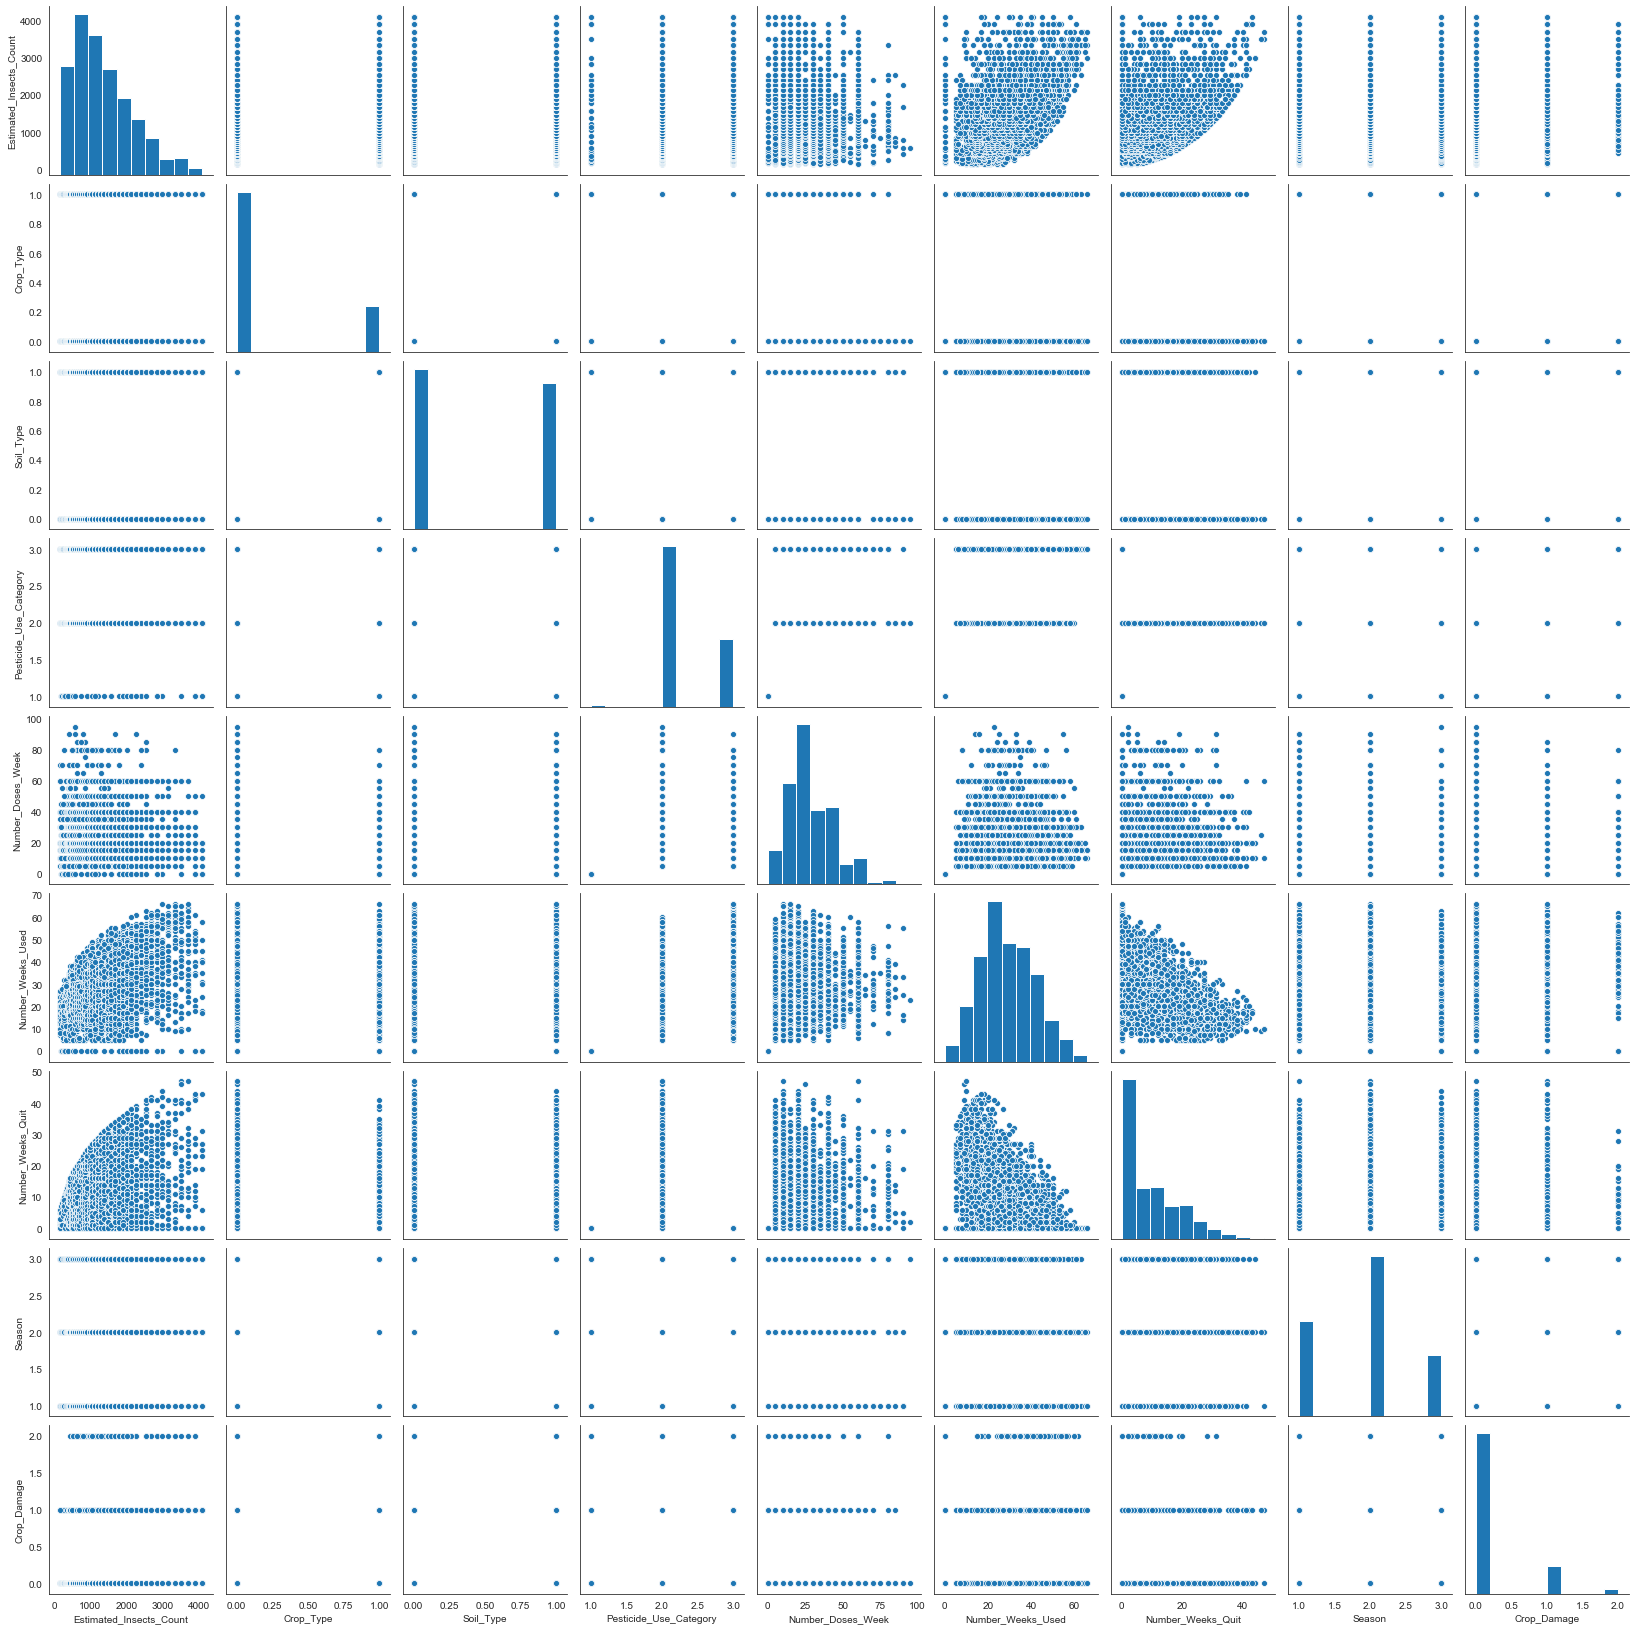

In [32]:
# Let's see the pairplot.

sns.pairplot(df_agri)

In [33]:
# FIlling the Missing Values.

# Let's fine the mode of Number_Weeks_Used

w_mode = df_agri['Number_Weeks_Used'].mode()
print("Mode of Number_Weeks_Used :", w_mode)

Mode of Number_Weeks_Used : 0    20.0
dtype: float64


In [34]:
# Now let's fill the null values present in 'Number_Weeks_Used' with it's mode value. The Number_Weeks_Used in testing data will be filled with the mode value from the training dataset.

df_agri.Number_Weeks_Used = df_agri.Number_Weeks_Used.fillna('20.0')
agri_test.Number_Weeks_Used = df_agri.Number_Weeks_Used.fillna('20.0')

Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
Crop_Damage                0
dtype: int64


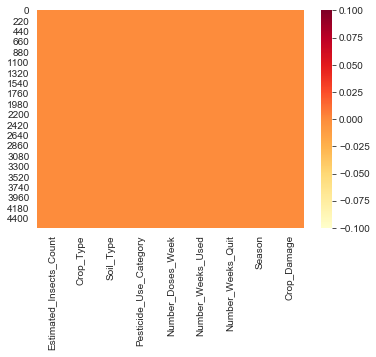

In [35]:
# Again checking the null values after filling the same.

print(df_agri.isnull().sum())
sns.heatmap(df_agri.isnull(), cmap = 'YlOrRd')
plt.show()

In [36]:
# Checking the null values in testing dataset as well.

print(agri_test.isnull().sum())

Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
dtype: int64


Thus, all the null values are filled.

In [37]:
df_agri['Number_Weeks_Used'].value_counts()

20.0    442
20.0    209
30.0    194
25.0    165
40.0    133
       ... 
63.0      5
62.0      5
65.0      3
66.0      3
64.0      1
Name: Number_Weeks_Used, Length: 64, dtype: int64

In [38]:
df_agri['Number_Weeks_Used'].dtypes

dtype('O')

In [39]:
# Using the LabelEncoder in order to convert the categorical data into numerical i.e. Number_Weeks_Used from testing data.
# the datatype was converted into string as labelencoder do not work on object type data.
from sklearn.preprocessing import LabelEncoder

lb=LabelEncoder()
df_agri['Number_Weeks_Used'] = df_agri['Number_Weeks_Used'].astype(str)
df_agri['Number_Weeks_Used'] = pd.DataFrame(lb.fit_transform(df_agri['Number_Weeks_Used']))
df_agri['Number_Weeks_Used'].head()

0    0
1    0
2    0
3    0
4    0
Name: Number_Weeks_Used, dtype: int32

In [40]:
# Let's now check the outliers and clean the data.

from scipy.stats import zscore

z = np.abs(zscore(df_agri))
print(z.shape)

# Removing the outliers.

df_agri = df_agri.loc[(z<3).all(axis=1)]
print(df_agri.shape)

(4599, 9)
(4308, 9)


By comparing shape of 'z' and 'df_agri' shape , 91 rows have been removed as an outlier.

In [41]:
# Let's check the skewness of the data.

df_agri.skew()

Estimated_Insects_Count    0.794607
Crop_Type                  1.324437
Soil_Type                  0.087393
Pesticide_Use_Category     0.738031
Number_Doses_Week          0.707262
Number_Weeks_Used          0.665351
Number_Weeks_Quit          0.824186
Season                     0.144519
Crop_Damage                1.989948
dtype: float64

In [42]:
# Treating the skewness with log function.

for col in df_agri.columns:
    if df_agri.skew().loc[col]>0.55:
        df_agri[col]=np.log1p(df_agri[col])

In [43]:
# Again checking the skewness after treament.

df_agri.skew()

Estimated_Insects_Count   -0.534981
Crop_Type                  1.324437
Soil_Type                  0.087393
Pesticide_Use_Category     0.501850
Number_Doses_Week         -1.190090
Number_Weeks_Used         -1.082765
Number_Weeks_Quit         -0.222967
Season                     0.144519
Crop_Damage                1.989948
dtype: float64

The skewness have been removed or treated to the most possible extent.

The cleaning of the data is done. So now, let's move further and do the testing and training of data by splitting the target and rest variables and selecting the best model through various algorithms and evaluation can be done.

Now, we'll train the model on training dataset and make predictions on the test dataset.

In [72]:
# Let's Separating the input and target variables with the target variable Deaths.

X = df_agri.drop(columns=["Season"])
y = df_agri[["Season"]]

In [73]:
# Let's check the shape of input and outpuut variables.

print(X.shape)
print(y.shape)

(4308, 8)
(4308, 1)


In [74]:
# Let's check the head of the input variables.
X.head()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Crop_Damage
0,5.241747,0.693147,0,0.693147,0.0,0.0,0.0,0.000000
1,5.347108,0.693147,0,0.693147,0.0,0.0,0.0,0.693147
2,5.552960,0.693147,0,0.693147,0.0,0.0,0.0,0.693147
3,5.552960,0.693147,1,0.693147,0.0,0.0,0.0,0.693147
4,5.837730,0.693147,0,0.693147,0.0,0.0,0.0,0.693147


In [75]:
# Let's check the head of the output variables.
y.head()

,Season
0,1
1,2
2,2
3,2
4,2


In [76]:
# Scaling the Input variables

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
X

array([[-2.70505186,  1.86124923, -0.95727222, ..., -3.97374181,
        -1.29045198, -0.41579226],
       [-2.54330465,  1.86124923, -0.95727222, ..., -3.97374181,
        -1.29045198,  2.40504719],
       [-2.22728498,  1.86124923, -0.95727222, ..., -3.97374181,
        -1.29045198,  2.40504719],
       ...,
       [ 1.02054119, -0.53727356,  1.04463493, ...,  1.16575168,
        -0.43542266,  2.40504719],
       [ 1.10972364, -0.53727356,  1.04463493, ..., -0.48774572,
         1.21473867, -0.41579226],
       [ 1.10972364, -0.53727356,  1.04463493, ...,  0.54191616,
         0.95907012, -0.41579226]])

In [83]:
# Importing the neccesary sklearn libraries.

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, roc_curve,auc, confusion_matrix

In [84]:
# Splitting the training and testing data and finding the maximum accuracy score at best random state.

def m (clf ,X, y):
    max_acc_scr = 0
    for r_state in range(42,101):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state = r_state)
        clf.fit(X_train, y_train)
        pred = clf.predict(X_test)
        acc_scr = accuracy_score(pred, y_test)
        if acc_scr > max_acc_scr:
            max_acc_scr = acc_scr
            final_r_state = r_state
    
    print("Maximum Accuracy score is :", max_acc_scr, "achieved at :", final_r_state)
    print("\n")
    print("Classification Report :\n", classification_report(pred, y_test))
    print("\n")
    print("Confusion Matrix :\n", confusion_matrix(pred, y_test))
    print("\n")

In [90]:
# Let's check the accuracy score and other scores of DecisionTreeClassifier.

print("-------DecisionTreeClassifier-------")
dtc = DecisionTreeClassifier()
r_state = m(dtc, X, y)

-------DecisionTreeClassifier-------
Maximum Accuracy score is : 0.41299303944315546 achieved at : 87


Classification Report :
               precision    recall  f1-score   support

           1       0.29      0.31      0.30       252
           2       0.46      0.47      0.47       419
           3       0.14      0.12      0.13       191

    accuracy                           0.35       862
   macro avg       0.30      0.30      0.30       862
weighted avg       0.34      0.35      0.34       862



Confusion Matrix :
 [[ 78 125  49]
 [132 198  89]
 [ 62 106  23]]




In [91]:
# Let's check the accuracy score and other scores of SVC.

print("-------SVC-------")
sv = SVC()
r_state = m(sv, X, y)

-------SVC-------
Maximum Accuracy score is : 0.5406032482598608 achieved at : 56


Classification Report :
               precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           2       1.00      0.50      0.66       862
           3       0.00      0.00      0.00         0

    accuracy                           0.50       862
   macro avg       0.33      0.17      0.22       862
weighted avg       1.00      0.50      0.66       862



Confusion Matrix :
 [[  0   0   0]
 [272 429 161]
 [  0   0   0]]




In [87]:
print("-------KNeighborsClassifier-------")
knnc = KNeighborsClassifier()
r_state = m(knnc, X, y)
print("Cross validation score :", cross_val_score(knnc, X, y, cv=5, scoring = "accuracy").mean())
print("Standard Deviationscore :", cross_val_score(knnc, X, y, cv=5, scoring = "accuracy").std())
print("\n")

-------KNeighborsClassifier-------
Maximum Accuracy score is : 0.4431554524361949 achieved at : 63


Classification Report :
               precision    recall  f1-score   support

           1       0.33      0.30      0.31       302
           2       0.57      0.47      0.51       515
           3       0.05      0.18      0.08        45

    accuracy                           0.40       862
   macro avg       0.32      0.32      0.30       862
weighted avg       0.46      0.40      0.42       862



Confusion Matrix :
 [[ 90 161  51]
 [170 243 102]
 [ 12  25   8]]


Cross validation score : 0.40645582889372145
Standard Deviationscore : 0.014771024619498774




In [88]:
print("-------RandomForestClassifier-------")
rfc = RandomForestClassifier()
r_state = m(rfc, X, y)
print("Cross validation score :", cross_val_score(rfc, X, y, cv=5, scoring = "accuracy").mean())
print("Standard Deviationscore :", cross_val_score(rfc, X, y, cv=5, scoring = "accuracy").std())
print("\n")

-------RandomForestClassifier-------
Maximum Accuracy score is : 0.45591647331786544 achieved at : 61


Classification Report :
               precision    recall  f1-score   support

           1       0.23      0.35      0.28       177
           2       0.71      0.49      0.58       617
           3       0.05      0.12      0.07        68

    accuracy                           0.44       862
   macro avg       0.33      0.32      0.31       862
weighted avg       0.56      0.44      0.48       862



Confusion Matrix :
 [[ 62  89  26]
 [185 305 127]
 [ 25  35   8]]


Cross validation score : 0.41689828101462983
Standard Deviationscore : 0.015615145009046635




Let’s make predictions for the test dataset and submit the result.

In [92]:
# make prediction on test set
pred_test = model.predict(agri_test)
print(pred_test)

[0. 0. 0. ... 0. 0. 0.]


SVC is selected as a model for this dataset as it is giving the best results out of all the algorithms tested.

In [93]:
# saving the model using joblib
from sklearn.externals import joblib

# Save the model as a pickle in a file
joblib.dump(sv, 'agriculturee.pkl')

['agriculturee.pkl']